In [10]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

warnings.filterwarnings('ignore')

In [2]:
path = '../../data/ANN_MLP_Classification/Dry_Bean_Dataset.csv'

df = pd.read_csv(path)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

In [6]:
y.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

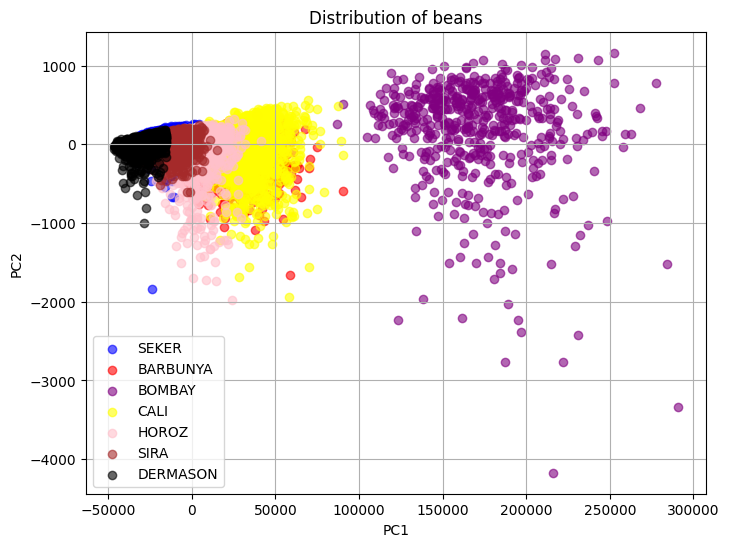

In [8]:
class_names = y.unique()
colors = ['blue', 'red', 'purple', 'yellow', 'pink', 'brown', 'black']

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.scatter(X_pca[y == class_names[i], 0], X_pca[y == class_names[i], 1],
                c=colors[i], label=class_names[i], alpha=0.6)

plt.title("Distribution of beans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
nb = GaussianNB()
logR = LogisticRegression(multi_class='multinomial')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7634671890303624
Precision: 0.7610473206816032
Recall: 0.7634671890303624


In [13]:
logR.fit(X_train, y_train)

y_pred = logR.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6951518119490695
Precision: 0.6911285731841813
Recall: 0.6951518119490695
